IMPORTING

In [174]:
import tensorflow as tf
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np

LOAD  & SPLIT the DATA

In [175]:
#load
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [176]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

print(X_train[0].shape)

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)
(32, 32, 3)


[0]


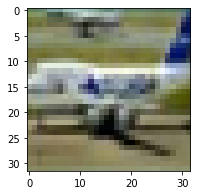

[3]


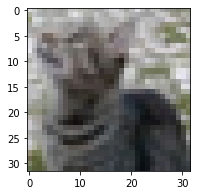

[3]


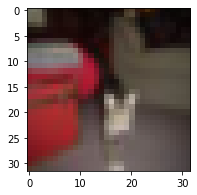

[2]


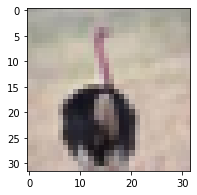

In [177]:
for i in range(332,336):
    #plt.subplot(120+ 1 + i)
    plt.figure(figsize=(3,3))
    img = X_train[i]
    plt.imshow(img)
    print(y_train[i])
    plt.show()

PREPROCESSING DATA

In [178]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test=X_test/255
n_classes = 10

# you should reshape your labels as 2d-tensor
# the first dimension will be the batch dimension and the second the scalar label)


print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 1)


MODEL

In [179]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
#CNN
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
#hidden
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.4))

#one_hot_label = to_cateorical(input_labels)

#output
model.add(Dense(10, activation='softmax'))
#model.add(Dense(10, activation='sigmoid'))
#compile
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile (loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer ='adam')
# train batch size 128 so 50000/128=390
#model.fit(X_train, y_train, batch_size=100, epochs=5)
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 121s 307ms/step - loss: 1.6058 - accuracy: 0.4088 - val_loss: 1.1440 - val_accuracy: 0.5901
Epoch 2/10
391/391 [==============================] - 186s 477ms/step - loss: 1.1104 - accuracy: 0.6080 - val_loss: 0.9093 - val_accuracy: 0.6778
Epoch 3/10
391/391 [==============================] - 125s 319ms/step - loss: 0.9251 - accuracy: 0.6788 - val_loss: 0.8074 - val_accuracy: 0.7186
Epoch 4/10
391/391 [==============================] - 118s 302ms/step - loss: 0.8140 - accuracy: 0.7192 - val_loss: 0.7361 - val_accuracy: 0.7460
Epoch 5/10
391/391 [==============================] - 117s 298ms/step - loss: 0.7338 - accuracy: 0.7445 - val_loss: 0.7176 - val_accuracy: 0.7548
Epoch 6/10
391/391 [==============================] - 156s 399ms/step - loss: 0.6720 - accuracy: 0.7671 - val_loss: 0.6963 - val_accuracy: 0.7608
Epoch 7/10
391/391 [==============================] - 123s 314ms/step - loss: 0.6129 - accuracy: 0.7855 - val_loss: 0.6674 -

In [180]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.6417 - accuracy: 0.7811


[0.6417385935783386, 0.7810999751091003]

PREDICTION

In [181]:
classes = range(0,10)

names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

class_labels = dict(zip(classes, names))
#generate a batch of 9 images
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

#predicting
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 81ms/step


In [182]:
for image in predictions:
    print(np.sum(image))

1.0
1.0000001
1.0
0.99999994
0.99999994
0.99999994
1.0
1.0
1.0


In [183]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)
#plot next

[4 5 6 3 1 1 0 6 8]


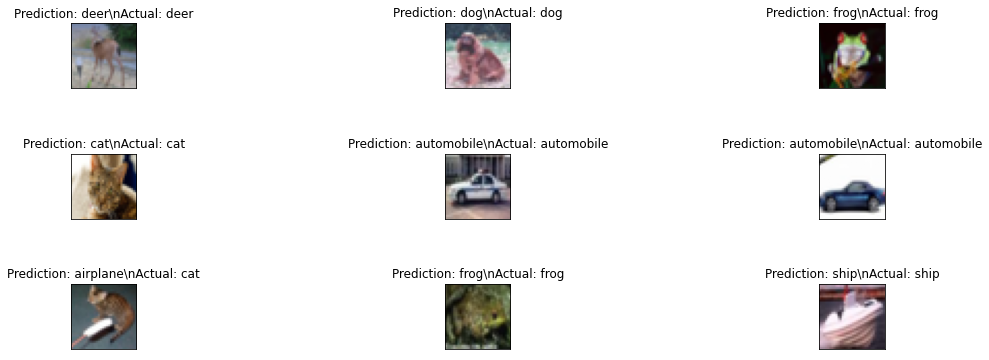

In [185]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
    axs[i].imshow(img)
plt.show()
#PREDICATED OUTPUT